In [8]:
import models.MLP.model as MLP
import models.CNN.model as CNN
import importlib
import numpy as np
from tqdm import tqdm
import torch

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import models.learning as L

transform_MNIST = transforms.Compose([
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.view(-1))
        ])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_MNIST)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_MNIST)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [9]:
import importlib

In [10]:
importlib.reload(MLP)
importlib.reload(L)

<module 'models.learning' from '/Users/isaac/Desktop/biological-deep-learning/models/learning.py'>

In [11]:
device = torch.device('cpu')

In [137]:
model = MLP.MLPBaseline_Model(64, 100, 0.005, 0.01, 1e-3, 0.99, 10, device, MLP.ClassifierLearning.Contrastive, MLP.Learning.FullyOrthogonal, MLP.WeightScale.WeightDecay)
model = MLP.TDBaseline_Experiment(1, model, train_dataloader, 'FashionMNIST', 10, device)

AttributeError: module 'models.MLP.model' has no attribute 'ClassifierLearning'

Training layer: SoftHebbian1


  0%|          | 0/60000 [00:00<?, ?it/s]

Training layer: SoftHebbian2


  0%|          | 0/60000 [00:00<?, ?it/s]

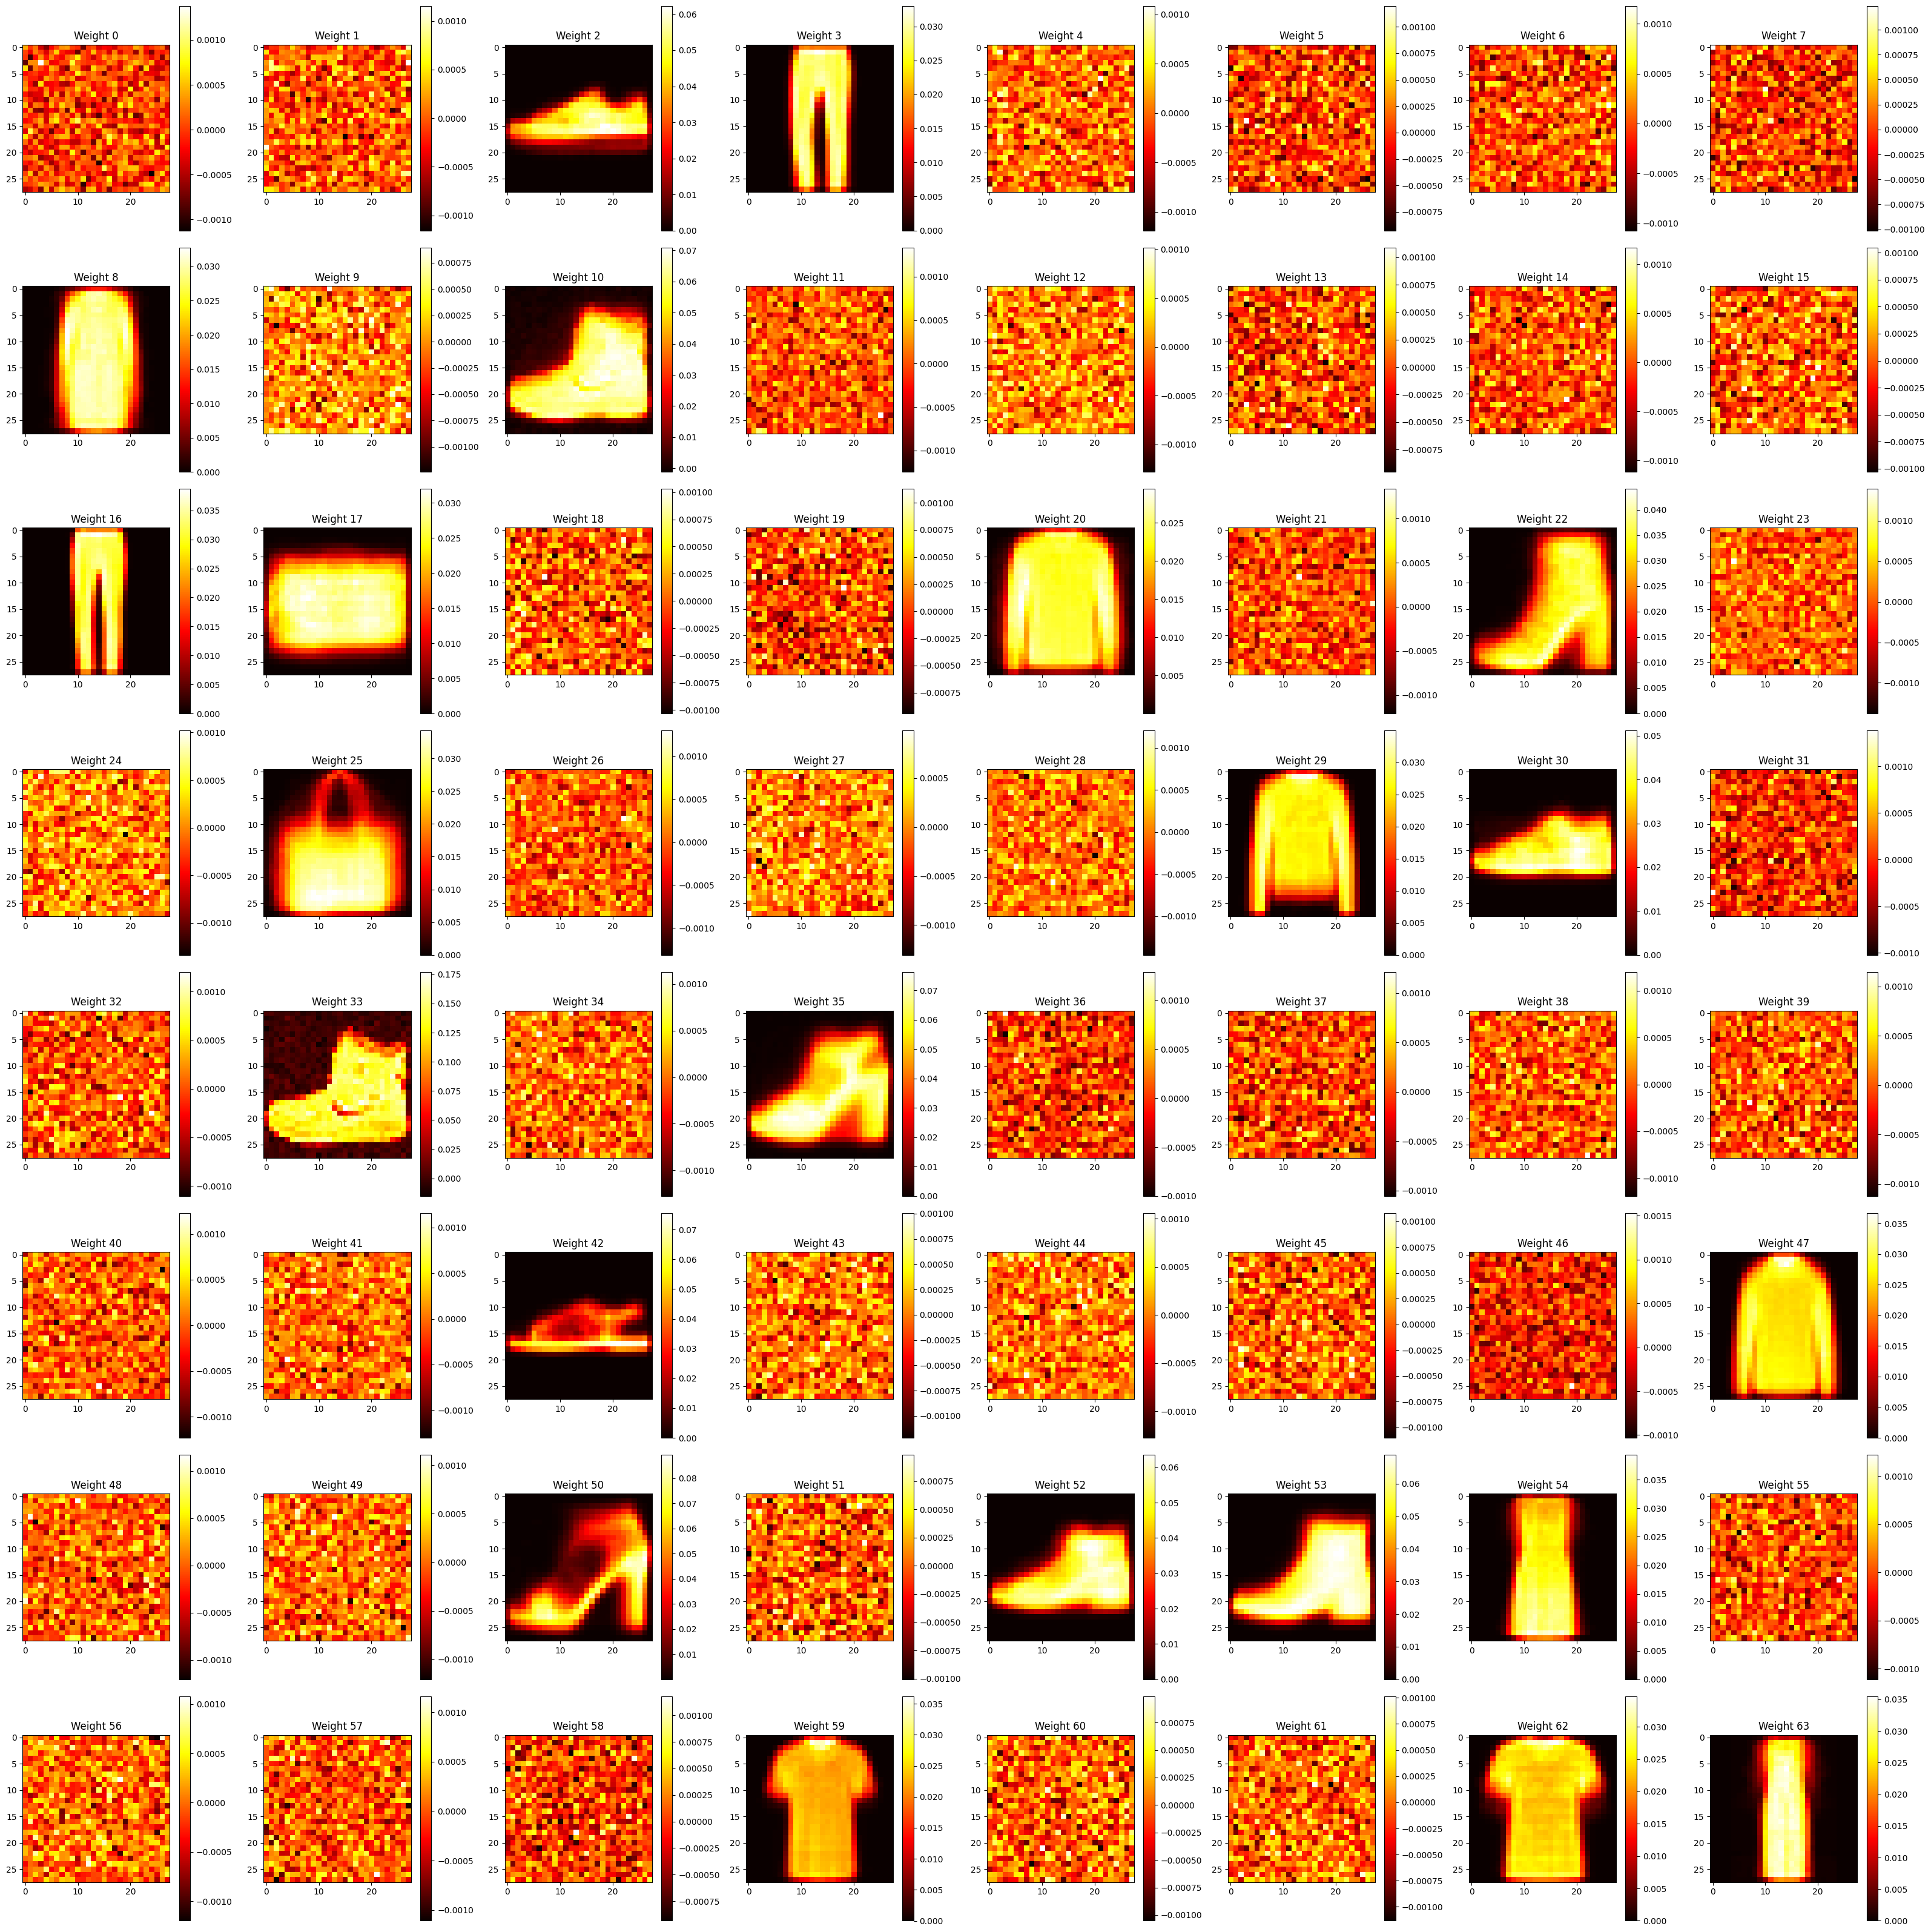

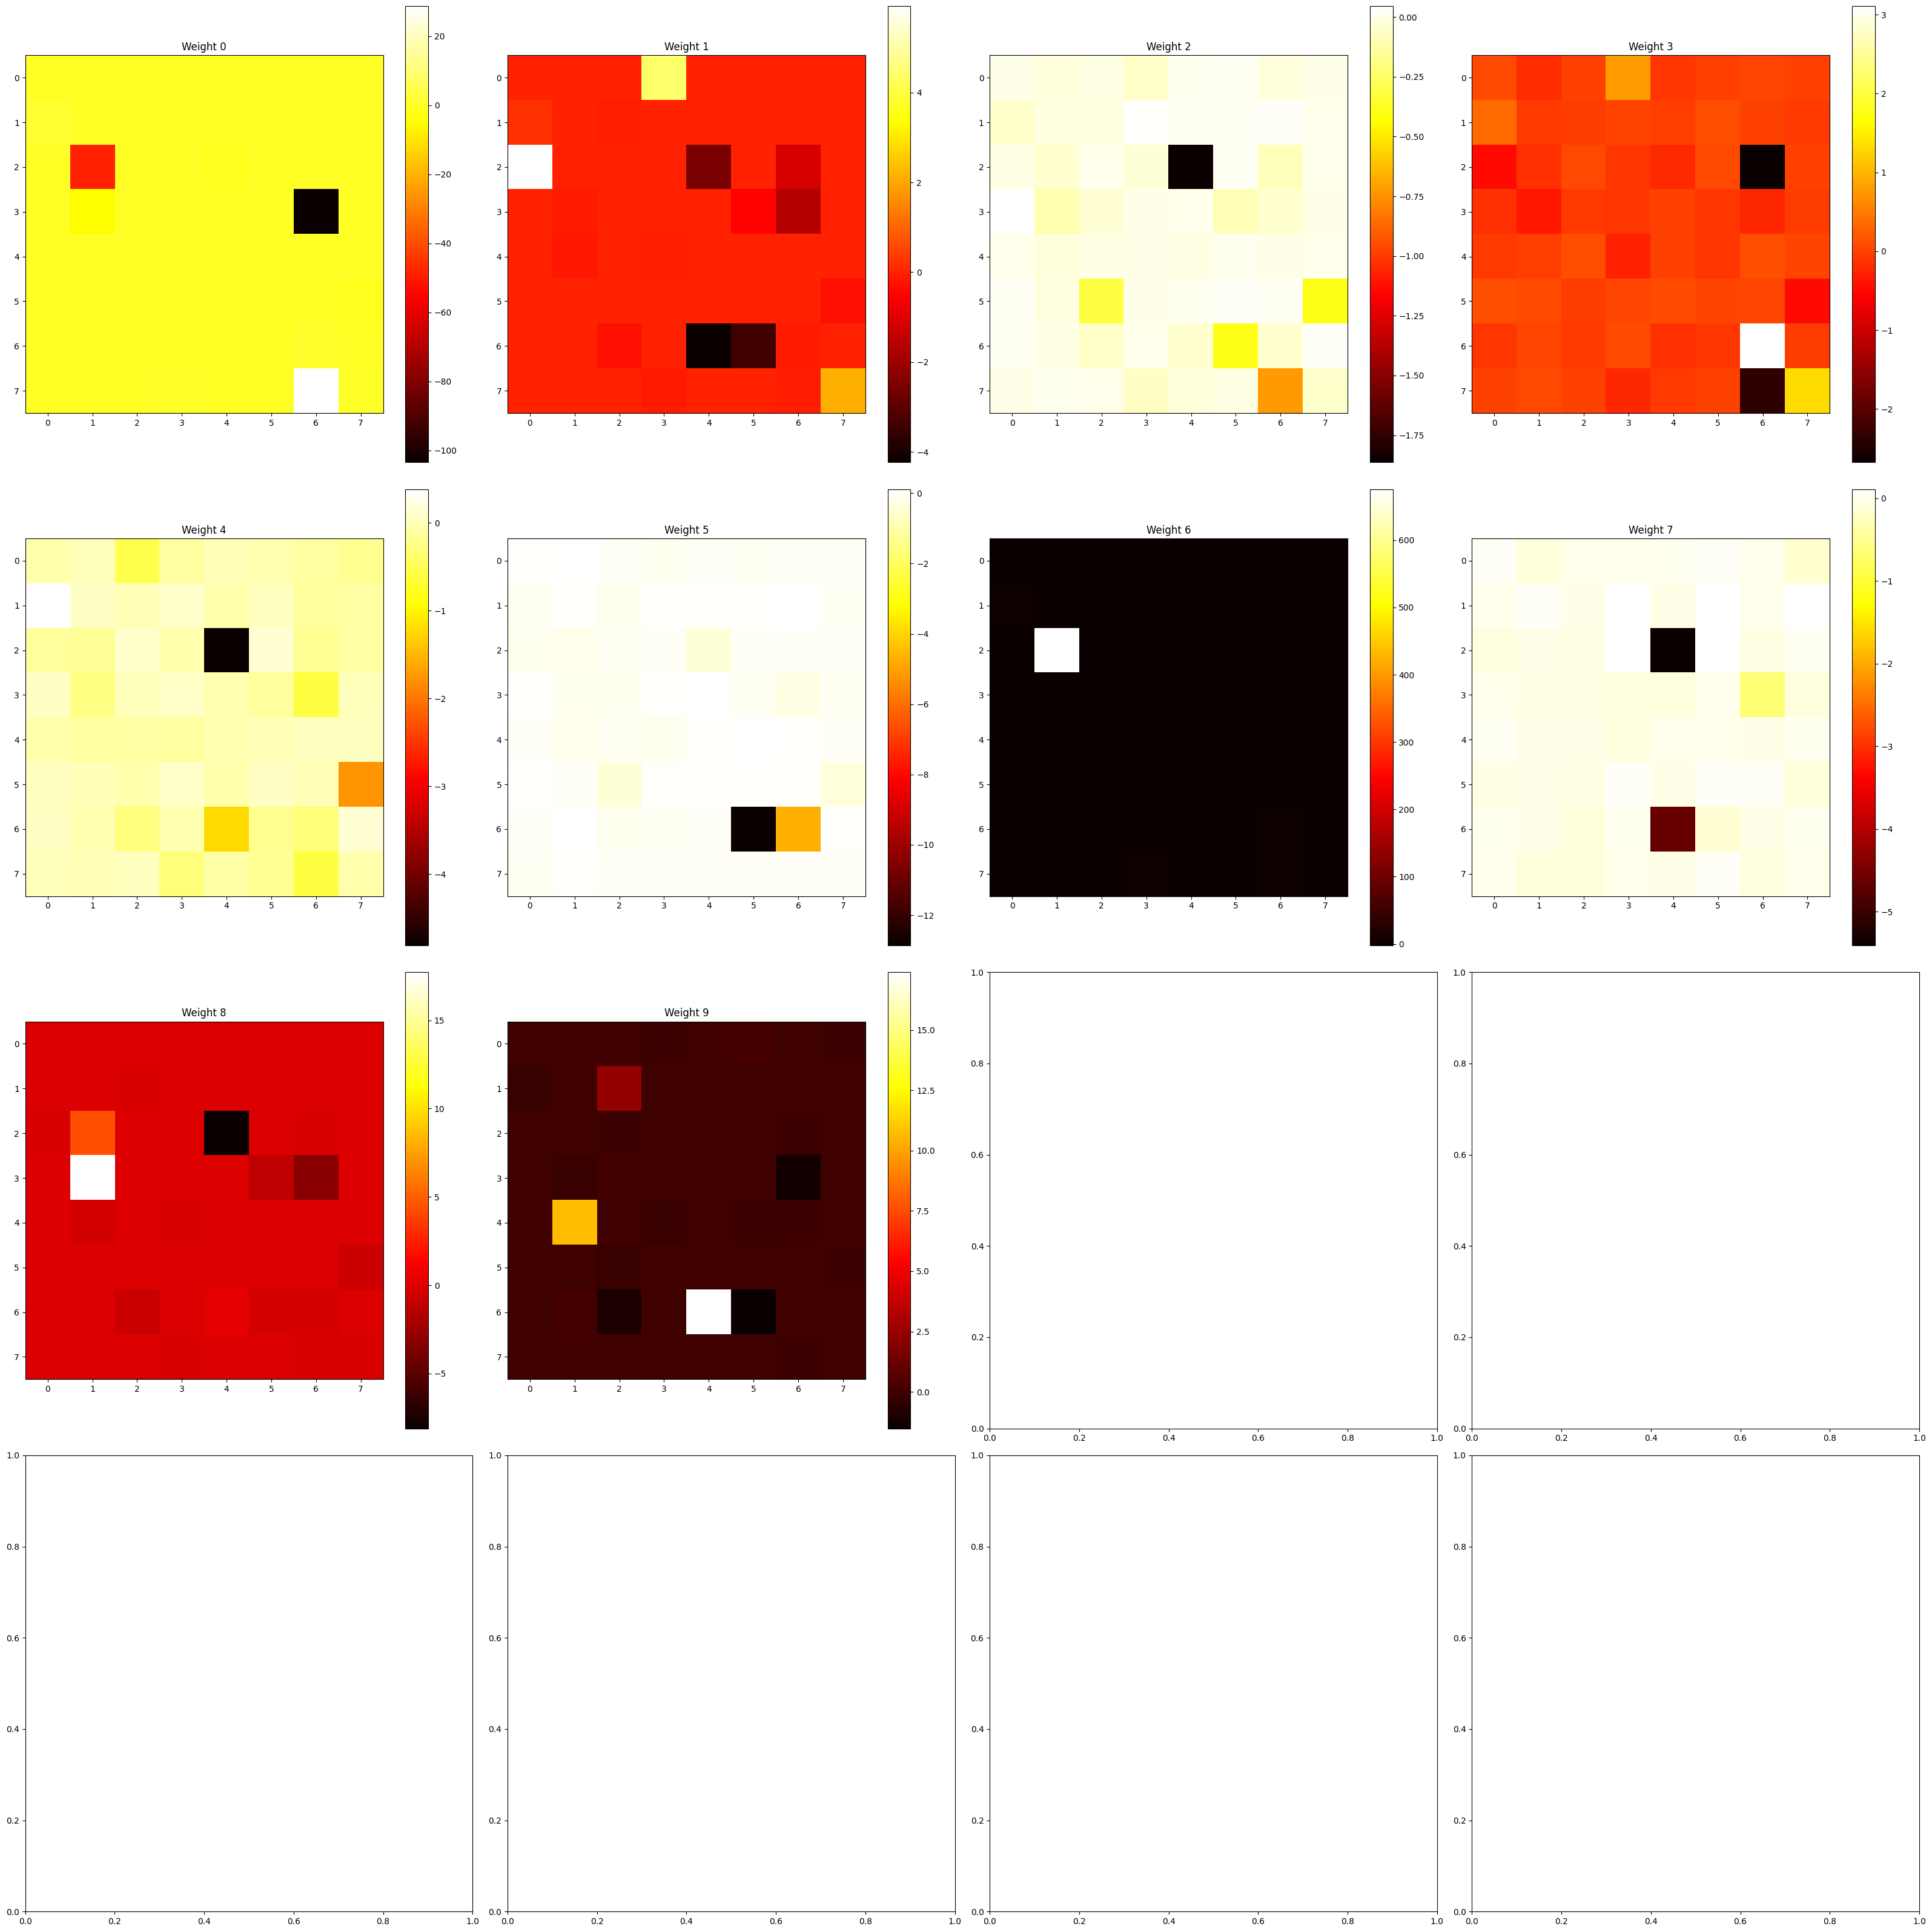

In [12]:
model = MLP.NewMLPBaseline_Model(hsize=64, lamb=5, w_lr=0.005, b_lr=0.005, l_lr=0.005, nclasses=10, device=device)
# Set greedytrain = true for layer wise training 
model = MLP.SoftMLPBaseline_Experiment(1, model, train_dataloader, 'FashionMNIST', 10, device, greedytrain=True)

In [6]:
print(model.layers['SoftHebbian1'].weight)

Parameter containing:
tensor([[ 3.1441e-04,  2.1505e-04, -3.1289e-04,  ...,  2.8681e-04,
         -4.0201e-05,  2.4083e-04],
        [ 1.0806e-21,  8.8962e-08,  1.8007e-07,  ...,  1.3264e-05,
          1.7121e-08,  4.3185e-16],
        [ 1.0108e-04, -4.1195e-04,  4.1923e-04,  ...,  6.2348e-04,
          1.3564e-04,  4.6194e-04],
        ...,
        [-6.0029e-05, -1.5446e-04, -3.1759e-04,  ...,  1.5631e-06,
          3.9073e-05,  1.3363e-05],
        [ 3.4387e-04,  1.3337e-04, -1.7228e-04,  ..., -1.0491e-04,
          4.3816e-05, -1.4621e-04],
        [ 6.7579e-23,  5.7513e-08,  5.7513e-08,  ...,  5.9778e-03,
          2.7484e-03,  9.1797e-05]])
